In [1]:
import numpy as np
from numpy.random import default_rng
from typing import Literal, Optional, Tuple, List
import matplotlib.pyplot as plt

In [ ]:
DistType = Literal["normal", "bimodal", "trimodal", "left-skewed", "right-skewed"]

def _sample_base(
    n: int,
    dist: DistType,
    rng: np.random.Generator,
    normal_loc: float = 0.5,
    normal_scale: float = 0.2,
    bimodal_locs: Tuple[float, float] = (0.25, 0.75),
    bimodal_scales: Tuple[float, float] = (0.12, 0.12),
    trimodal_locs: Tuple[float, float, float] = (0.2, 0.5, 0.8),
    trimodal_scales: Tuple[float, float, float] = (0.10, 0.08, 0.10),
    beta_ab_right: Tuple[float, float] = (2.0, 5.0),
    beta_ab_left: Tuple[float, float] = (5.0, 2.0),
) -> np.ndarray:
    if dist == "normal":
        x = rng.normal(loc=normal_loc, scale=normal_scale, size=n)
    elif dist == "bimodal":
        mix = rng.integers(0, 2, size=n)
        x = rng.normal(loc=bimodal_locs[0], scale=bimodal_scales[0], size=n)
        x[mix == 1] = rng.normal(
            loc=bimodal_locs[1],
            scale=bimodal_scales[1],
            size=(mix == 1).sum()
        )
    elif dist == "trimodal":
        mix = rng.choice(3, size=n, p=[1/3, 1/3, 1/3])
        x = np.empty(n, dtype=float)
        for k, (loc, sc) in enumerate(zip(trimodal_locs, trimodal_scales)):
            idx = (mix == k)
            x[idx] = rng.normal(loc=loc, scale=sc, size=idx.sum())
    elif dist == "right-skewed":
        a, b = beta_ab_right
        x = rng.beta(a, b, size=n)
    elif dist == "left-skewed":
        a, b = beta_ab_left
        x = rng.beta(a, b, size=n)
    else:
        raise ValueError(f"Unknown distribution type: {dist}")
    return np.clip(x, 0.0, 1.0)

def generate_x0(
    num_agents: int,
    num_topics: int,
    include_negative: bool = True,
    dist: DistType = "normal",
    seed: Optional[int] = None,
    normal_loc: float = 0.5,
    normal_scale: float = 0.2,
    bimodal_locs: Tuple[float, float] = (0.25, 0.75),
    bimodal_scales: Tuple[float, float] = (0.12, 0.12),
    trimodal_locs: Tuple[float, float, float] = (0.2, 0.5, 0.8),
    trimodal_scales: Tuple[float, float, float] = (0.10, 0.08, 0.10),
    beta_ab_right: Tuple[float, float] = (2.0, 5.0),
    beta_ab_left: Tuple[float, float] = (5.0, 2.0),
) -> np.ndarray:
    rng = default_rng(seed)
    cols: List[np.ndarray] = []
    for _ in range(num_topics):
        base01 = _sample_base(
            n=num_agents,
            dist=dist,
            rng=rng,
            normal_loc=normal_loc,
            normal_scale=normal_scale,
            bimodal_locs=bimodal_locs,
            bimodal_scales=bimodal_scales,
            trimodal_locs=trimodal_locs,
            trimodal_scales=trimodal_scales,
            beta_ab_right=beta_ab_right,
            beta_ab_left=beta_ab_left,
        )
        if include_negative:
            vals = 2.0 * base01 - 1.0
        else:
            vals = base01
        cols.append(vals.reshape(-1, 1))
    x0 = np.hstack(cols)
    return x0


In [3]:
x0 = generate_x0(
    num_agents=100,
    num_topics=3,
    include_negative=True,
    dist="bimodal",
    seed=42
)
print(x0)


[[-0.33706074  0.00482281  0.45698561]
 [ 0.75583526 -0.76322854 -0.58226868]
 [ 0.53769166 -0.05914075  0.43918938]
 [-0.34849083  0.19721612  0.46179563]
 [-0.8497174  -0.78117599  0.54881318]
 [ 0.46192764 -0.58837975 -0.23249781]
 [-0.61288944 -0.41802667 -0.40798949]
 [ 0.2514431   0.35813518 -0.53147301]
 [-0.56603414  0.64181752 -0.41629379]
 [-0.14121409 -0.55886668 -0.03175699]
 [ 0.09807609 -0.31343898  0.25795135]
 [ 0.3832861   0.12041734  0.66964391]
 [ 0.48709219  0.85422777  0.65903983]
 [ 0.92430318  0.58840559 -0.24170236]
 [ 0.53126589  0.70318016 -0.70295865]
 [ 0.73585748  0.36297352  0.59240911]
 [ 0.38016906 -0.563933   -0.50620708]
 [-0.30959666 -0.44427923  0.63356803]
 [ 0.2156135   0.69530329  0.57114032]
 [-0.61096443  0.75643317 -0.8814962 ]
 [ 0.26837198 -0.2569482  -0.99751602]
 [-0.54591304  0.55589072 -0.76817219]
 [-0.80616472 -0.41557846 -0.61008207]
 [ 0.32594574  0.55625621 -0.57036598]
 [ 1.          0.56488238  0.98841759]
 [ 0.3028672  -0.67317393

In [4]:
x0_left = generate_x0(
    num_agents=120,
    num_topics=5,
    include_negative=False,
    dist="left-skewed",
    seed=123
)
print(x0_left)

[[0.41861096 0.71262089 0.80820766 0.75549362 0.80824634]
 [0.87723774 0.80595648 0.69325091 0.73847812 0.58884858]
 [0.69104869 0.91812127 0.73813183 0.87616576 0.72394855]
 [0.69993576 0.68391239 0.89917441 0.98396871 0.64739714]
 [0.87191728 0.85170309 0.68710515 0.81287858 0.87730462]
 [0.22706185 0.59475508 0.79710957 0.92980466 0.45228088]
 [0.62301336 0.6878545  0.41305082 0.58663238 0.42315032]
 [0.81761363 0.67092924 0.70600858 0.31529377 0.6730786 ]
 [0.8642265  0.413261   0.88432246 0.54156346 0.86976599]
 [0.67226669 0.90929681 0.79687797 0.90660476 0.84032751]
 [0.60021291 0.85457475 0.85670793 0.46023719 0.70147195]
 [0.67878822 0.4898349  0.78780448 0.82713562 0.6560306 ]
 [0.87126564 0.68482944 0.55141118 0.37514554 0.82398732]
 [0.80861056 0.93678609 0.93660606 0.83487095 0.86516087]
 [0.607857   0.79626037 0.58948029 0.75930071 0.69545326]
 [0.73551818 0.62536925 0.72240084 0.82838405 0.77254683]
 [0.48897049 0.78755824 0.90283246 0.60066723 0.85890551]
 [0.79128777 0

In [5]:
x0_norm = generate_x0(
    num_agents=80,
    num_topics=2,
    include_negative=True,
    dist="normal",
    normal_loc=0.5,
    normal_scale=0.15,
    seed=7
)
print(x0_norm)

[[ 3.69046007e-04 -1.28407483e-01]
 [ 8.96236613e-02 -9.11041165e-02]
 [-8.22413566e-02  1.05776720e-01]
 [-2.67177552e-01 -3.62311335e-02]
 [-1.36401236e-01 -5.91852684e-02]
 [-2.97493966e-01 -3.34220143e-01]
 [ 1.80430808e-02 -3.45644041e-03]
 [ 4.02064574e-01 -1.33074367e-01]
 [-1.47661956e-01  3.49838333e-01]
 [-1.86142470e-01  1.95926551e-01]
 [ 1.46952615e-01 -7.24308390e-03]
 [ 1.07066102e-01  2.00514307e-01]
 [ 3.16242747e-02 -1.01960866e-01]
 [-2.79140413e-01  3.15637908e-01]
 [-8.77554674e-03 -1.61986820e-03]
 [ 2.08590958e-01  1.75014706e-01]
 [-4.03264364e-01 -3.87267974e-01]
 [-1.37284728e-01  1.04004015e-01]
 [-5.70366822e-01 -5.06461235e-01]
 [-3.86861322e-01 -6.10598683e-01]
 [-5.52520511e-01 -9.13430633e-02]
 [-7.05273393e-02 -2.69978282e-01]
 [-3.80233944e-01  4.92158387e-02]
 [ 8.13793076e-02  6.73426988e-01]
 [ 4.70253260e-02 -2.49516954e-01]
 [-5.60792834e-02 -1.87183076e-01]
 [-7.55027913e-01  6.16211838e-02]
 [-1.61607869e-01  1.47903987e-01]
 [-1.45502836e-02 -5

In [6]:
def visualize_x0(x0, dist):
    num_topics = x0.shape[1]
    for j in range(num_topics):
        plt.figure(figsize=(6, 4))
        plt.hist(x0[:, j], bins=30, density=True)
        plt.title(f"x(0) Topic {j+1} ({dist})")
        plt.xlabel("Opinion value")
        plt.ylabel("Density")
        plt.show()


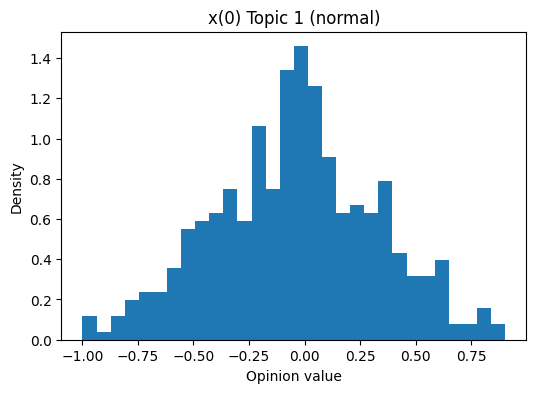

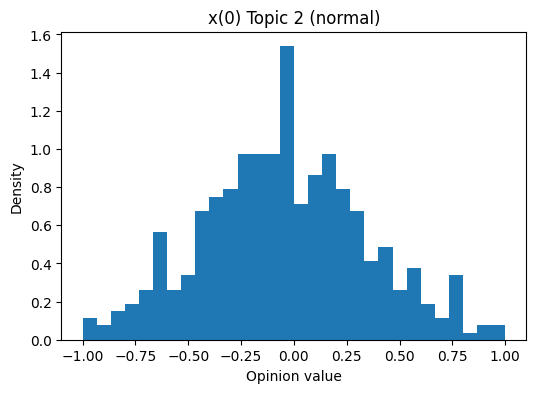

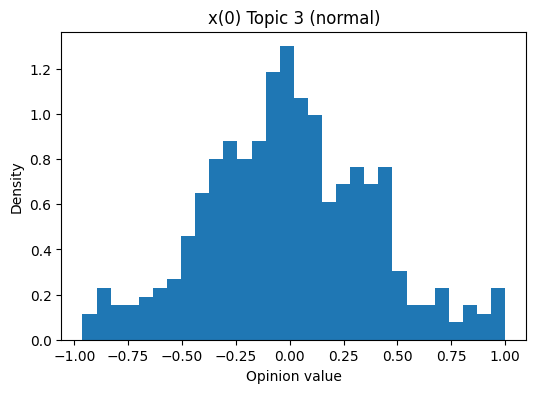

In [7]:
x0_demo = generate_x0(num_agents=400, num_topics=3, dist="normal", include_negative=True, seed=7)
visualize_x0(x0_demo, dist="normal")